Doğruluk: 0.8048289738430584


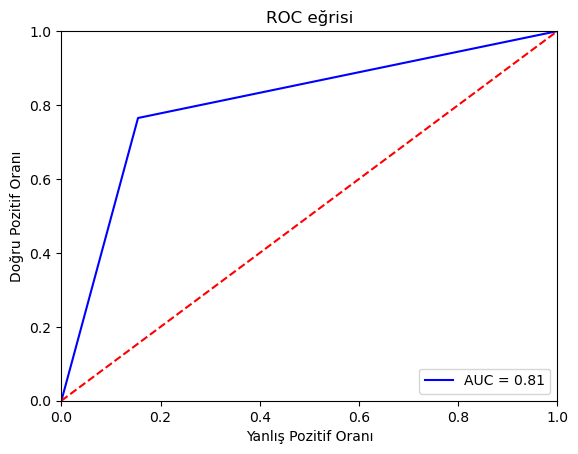

In [1]:
import numpy as np
import PIL.Image as img
import os
import pandas as pd
covidli="./COVID/"
covid_olmayan="./non-COVID/"
sinif_adi=""
goruntuler=""
def dosya(yol):
 return [os.path.join(yol,f) for f in os.listdir(yol)]
def veri_donusturme(klasor_adi,sinif_adi):
    goruntuler=dosya(klasor_adi)
    goruntu_sinif=[]
    for goruntu in goruntuler:
        goruntu_oku= img.open(goruntu).convert('L')
        gorunu_boyutlandirma=goruntu_oku.resize((28,28))
        goruntu_donusturme=np.array(gorunu_boyutlandirma).flatten()
        if sinif_adi=="covidli":
            veriler=np.append (goruntu_donusturme, [0])
        elif sinif_adi=="covid_olmayan":
            veriler=np.append (goruntu_donusturme, [1])
        else:
            continue
        goruntu_sinif.append(veriler)
    return goruntu_sinif
covidli_veri=veri_donusturme(covidli,"covidli")
covidli_df=pd.DataFrame(covidli_veri)
covidli_olmayan_veri=veri_donusturme(covid_olmayan,"covid_olmayan")
covidli_olmayan_df=pd.DataFrame(covidli_olmayan_veri)
tum_veri= pd.concat([covidli_df, covidli_olmayan_df])
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
Giris=np.array(tum_veri)[:,:784]
Cikis=np.array(tum_veri)[:,784]
Giris_train, Giris_test, Cikis_train, Cikis_test = train_test_split(Giris, Cikis,
test_size=0.2, random_state=1)
model= DecisionTreeClassifier()
clf = model.fit(Giris_train,Cikis_train)
Cikis_pred = clf.predict(Giris_test)
print("Doğruluk:",metrics.accuracy_score(Cikis_test, Cikis_pred))
import matplotlib.pyplot as cizim
ypo, dpo, threshold = metrics.roc_curve(Cikis_test, Cikis_pred)
roc_auc = metrics.auc(ypo, dpo)
cizim.title('ROC eğrisi')
cizim.plot(ypo, dpo, 'b', label = 'AUC = %0.2f' % roc_auc)
cizim.legend(loc = 'lower right')
cizim.plot([0, 1], [0, 1],'r--')
cizim.xlim([0, 1])
cizim.ylim([0, 1])
cizim.ylabel('Doğru Pozitif Oranı')
cizim.xlabel('Yanlış Pozitif Oranı')
cizim.show()